# Kaplan-Meier Survival Plots

In [1]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Lets try it with the TCGA dataset

In [2]:
tcga_metatata_file = '../Data/TCGA_OV_VST/TCGA_OV_VST_Metadata.tsv'
df = pd.read_csv(tcga_metatata_file, sep='\t')
df.dropna(inplace=True)

In [3]:
time = np.array(df['survival_time']) / 365
vital_status = df['vital_status']
age_at_diag = np.array(df['age_at_diagnosis'])
median_age = np.median(age_at_diag)
status_dict = {'Alive':0, 'Dead':1}
event = np.array([status_dict[s] for s in vital_status ])


In [4]:
median_age = np.median(age_at_diag)
b_young = age_at_diag < median_age
b_old = age_at_diag >= median_age

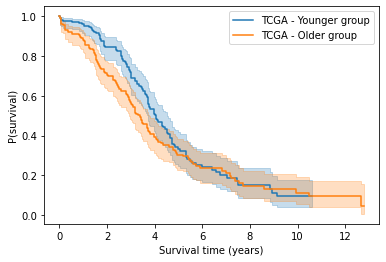

In [5]:
kmf = KaplanMeierFitter() 
kmf.fit(time[b_young], event[b_young])
axis1 = kmf.plot(label="TCGA - Younger group")

kmf.fit(time[b_old], event[b_old])
kmf.plot(ax=axis1, label="TCGA - Older group")
plt.xlabel("Survival time (years)")
plt.ylabel("P(survival)")
plt.show()

In [83]:
dir(kmf)

['_KaplanMeierFitter__estimate',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_additive_f',
 '_additive_var',
 '_bounds',
 '_censoring_type',
 '_check_values',
 '_class_name',
 '_cumulative_sq_',
 '_estimate_name',
 '_estimation_method',
 '_fit',
 '_label',
 '_median',
 '_update_docstrings',
 'alpha',
 'conditional_time_to_event_',
 'confidence_interval_',
 'confidence_interval_cumulative_density_',
 'confidence_interval_survival_function_',
 'cumulative_density_',
 'cumulative_density_at_times',
 'cumulative_hazard_at_times',
 'divide',
 'durations',
 'entry',
 'event_observed',
 'event_table',
 'fit',
 'fit_interval_censoring',
 'fit_left_cens

In [6]:
naf = NelsonAalenFitter()
naf = naf.fit(time[b_young], event[b_young])

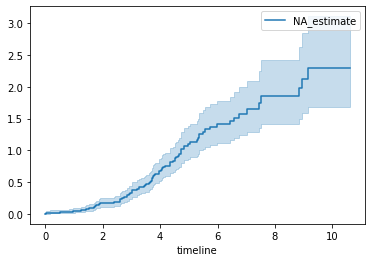

In [7]:
naf.plot()

In [8]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.000000,0.000000
0.024658,0.005495
0.030137,0.011019
0.065753,0.016575
0.145205,0.022193
...,...
9.589041,2.290304
9.657534,2.290304
9.915068,2.290304


In [9]:
dir(naf)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_additive_f',
 '_additive_f_discrete',
 '_additive_f_smooth',
 '_bounds',
 '_censoring_type',
 '_class_name',
 '_cumulative_sq',
 '_estimate_name',
 '_estimation_method',
 '_label',
 '_update_docstrings',
 '_variance_f',
 '_variance_f_discrete',
 '_variance_f_smooth',
 'alpha',
 'ci_labels',
 'conditional_time_to_event_',
 'confidence_interval_',
 'confidence_interval_cumulative_hazard_',
 'cumulative_density_at_times',
 'cumulative_hazard_',
 'cumulative_hazard_at_times',
 'divide',
 'durations',
 'entry',
 'event_observed',
 'event_table',
 'fit',
 'fit_right_censoring',
 'hazard_at_times',
 'median

## Cox Proportional Hazard Model

In [109]:
df2 = pd.DataFrame()
df2['event'] = event
df2['years'] = time
df2['age_at_diag'] = age_at_diag
threshold_age = np.percentile(age_at_diag, 50)
df2['old'] = [1 if a > threshold_age else 0 for a in age_at_diag]
#df2['random'] = np.random.randn(len(df2))
#df2['event_ish1'] = event + np.random.randn(len(df2))
#df2['event_ish2'] = event + 0.1*np.random.randn(len(df2))

In [110]:
cph = CoxPHFitter()
cph.fit(df2, duration_col='years', event_col='event')
# cph.print_summary()

<lifelines.CoxPHFitter: fitted with 364 total observations, 140 right-censored observations>

In [111]:
cph.hazard_ratios_

age_at_diag    1.000116
old            0.574498
Name: exp(coef), dtype: float64

In [112]:
cph._compute_p_values()

array([0.00030028, 0.02726626])

In [106]:
dir(cph)

['AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_compute_scaled_schoenfeld',
 '_compute_schoenfeld',
 '_compute_schoenfeld_within_strata',
 '_compute_score',
 

In [38]:
help(cph.fit)

Help on method fit in module lifelines.fitters.coxph_fitter:

fit(df:pandas.core.frame.DataFrame, duration_col:Union[str, NoneType]=None, event_col:Union[str, NoneType]=None, show_progress:bool=False, initial_point:Union[numpy.ndarray, NoneType]=None, strata:Union[List[str], str, NoneType]=None, step_size:Union[float, NoneType]=None, weights_col:Union[str, NoneType]=None, cluster_col:Union[str, NoneType]=None, robust:bool=False, batch_mode:Union[bool, NoneType]=None, timeline:Union[Iterator, NoneType]=None) -> 'CoxPHFitter' method of lifelines.fitters.coxph_fitter.CoxPHFitter instance
    Fit the Cox proportional hazard model to a dataset.
    
    Parameters
    ----------
    df: DataFrame
        a Pandas DataFrame with necessary columns `duration_col` and
        `event_col` (see below), covariates columns, and special columns (weights, strata).
        `duration_col` refers to
        the lifetimes of the subjects. `event_col` refers to whether
        the 'death' events was obser

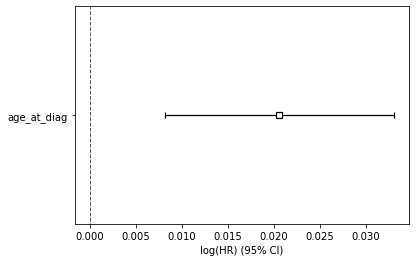

In [39]:
cph.plot()
plt.show()

## Conclusion
So we see that the younger age group has a better survival changes
upt to around 4 years, but the difference disapeares for longer survival times

In [14]:
dir(cph)

['AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_compute_scaled_schoenfeld',
 '_compute_schoenfeld',
 '_compute_schoenfeld_within_strata',
 '_compute_score',
 